<a href="https://colab.research.google.com/github/TenKim0503/Financial_Engineering/blob/main/Machine_learning_for_Finance_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # import numpy

In [ ]:
from scipy.stats import norm # Normal Distribution from  scipy.stats

In [ ]:
norm.cdf(0) # CDF of normal distribution->P(X<=0)

0.5

In [ ]:
norm.cdf(3) # CDF of normal distribution->P(X<=3)

0.9986501019683699

In [ ]:
s0 = 100 #기초가격
K = 100 #행사가격
T = 30/365 #(30 days left)
r = 0 #(risk interest rate)
sig = 0.2 #Volatility

In [ ]:
d1 = (np.log(s0/K)+ (r+0.5*sig**2)*T)/(sig*np.sqrt(T))

In [ ]:
d2 = (np.log(s0/K)+ (r-0.5*sig**2)*T)/(sig*np.sqrt(T))

In [ ]:
d1

0.028669108954049796

In [ ]:
d2

-0.028669108954049796

In [ ]:
s0 *  norm.cdf(d1)-K*np.exp(-r*T) * norm.cdf(d2) #Price of Call Option , Black-Sholes formula

2.2871506280449694

In [ ]:
## How to explain the dynamics of stock's price

In [ ]:
np.random.normal(size=(10,30)) #10=10개의 주가 시나리오, 30=하나의 시나리오 안에서 30일동안의 주가 움직임

array([[-1.92842514, -0.57199464, -1.36643145,  0.19322   ,  0.45241362,
         0.02827128, -0.84036833,  0.09644853,  1.31435898, -1.78852392,
        -0.17235105, -0.82536139, -0.86637908, -0.29399433,  0.78937714,
        -1.25435132, -1.02108595, -0.38309794,  2.0505626 ,  0.39188268,
         1.6324823 , -0.05330127,  0.22252309, -0.55926495, -0.51225151,
        -0.44037201,  0.89553959, -1.29504463,  0.81056707,  0.20598682],
       [ 1.09983392,  0.85433438,  1.93633174,  1.29372675,  1.14954331,
        -0.26687878,  0.82452347,  2.44381723,  0.15903313, -0.13456569,
        -1.99769469, -1.04393161,  1.10116422, -0.09217642,  0.71380584,
        -0.98823617,  0.57879762,  1.34205493,  0.25321648, -0.52796101,
         1.63327701, -1.60974207,  0.8788798 ,  0.14789577,  0.74713139,
        -1.8194687 , -0.38231344, -0.54839299,  0.83799817, -0.24784367],
       [ 0.17084708,  0.20167   , -0.33712323, -0.34774718,  0.45914695,
        -0.27876606, -0.14630235,  0.76813382,  0

In [ ]:
M=2
N=30
S=np.random.normal(size=(M,N))  #Random number generator
#M=M개의 주가 시나리오, 30=하나의 시나리오 안에서 30일동안의 주가 움직임
#여기서 30은 Normal(0,1)의 random numbers의 개수
S.shape

(2, 30)

In [ ]:
for j in range(N):
  if j == 0:
    S[0,j] = s0 *(1+ sig* np.sqrt(T/N)*S[0,j])
  else:
    S[0,j] = S[0,j-1] * (1+ sig* np.sqrt(T/N)*S[0,j])

In [ ]:
S[0,:]

In [ ]:
for i in range(M):
  for j in range(N):
    if j == 0:
      S[i,j] = s0 *(1+ r*T/N+ sig * np.sqrt(T/N)*S[i,j])
    else:
      S[i,j] = S[i,j-1] * (1+ r*T/N +sig* np.sqrt(T/N)*S[i,j])

In [ ]:
S

array([[100.90641692, 101.28508544, 101.03477215, 100.60044907,
         99.77790014, 100.35985654, 101.55100359,  99.81367498,
         98.38132907,  99.90767767, 101.62596678, 100.3823303 ,
        100.37234786, 100.96780584, 101.48444119, 101.9827184 ,
         99.99982264,  99.49172794,  99.13435012,  99.31531449,
         98.4378143 , 100.46672804, 100.30789233, 101.04038055,
         99.48466103,  97.73625026,  97.65189935,  95.91771198,
         96.69681195,  98.47785314],
       [ 99.47326446,  99.35201371,  98.15196317,  99.24854922,
         99.96614757,  98.6498099 , 101.07548574, 101.20358053,
        102.1792062 , 102.65546962, 103.62817832, 104.56491428,
        104.84464164, 103.93007878, 104.3727105 , 102.1281268 ,
        102.3745624 , 101.64302107, 102.60929003, 103.21577404,
        103.79421634, 103.09867893, 103.93223909, 101.55803946,
        100.07421018, 102.04973405, 101.41124758, 101.48986998,
        100.94292136, 101.05712252]])

In [ ]:
for i in range(M):
  for j in range(N):
    if j == 0:
      print(S[i,j])
      S[i,j] = s0 *(1+ r*T/N+ sig * np.sqrt(T/N)*S[i,j])
      print(S[i,j])
    else:
      pass

-1.216100782237262
98.7269275165927
-0.059677640384080397
99.93752659075848


In [ ]:
import matplotlib.pyplot as plt

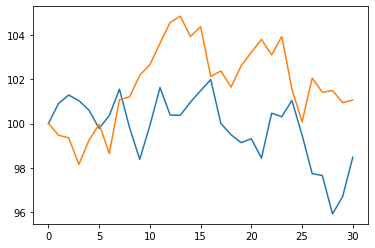

In [ ]:
for i in range(M):
  plt.plot([s0]+ list(S[i,:]))

plt.show()